# Clean And Analyze Employee Exit Surveys
Main focus in that project will be made at data aggregation, data cleaning and combining with pandas library.

For that project I'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 
The TAFE exit survey can be found [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). Authors of the challenge made some slight modifications to these datasets to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)
I'll try to answer following questions:
 - Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
 - Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

These questions require following information:
 - how long does employer work there (end date - start date)
 - maybe position of employer
 - type pf resignation (e.g. retirement or voluntary resignation)
 - age of employer
 - reasons for resignation (grouped by categories)
 
 Let's have a look at **Department of Education, Training and Employment dataset (`dete_survey`)**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [2]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
dete_survey.iloc[:,10:28].head()

,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above
0,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [4]:
dete_survey.iloc[:, 28:49].head(10)

,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,...,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety
0,A,A,N,N,N,A,A,A,A,N,...,N,A,A,A,N,A,A,N,N,N
1,A,A,N,N,N,N,A,A,A,N,...,N,A,A,A,N,A,A,N,N,N
2,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,A,A,N,N,N,N
3,A,N,N,N,A,A,N,N,A,A,...,A,A,A,A,A,A,A,A,N,A
4,A,A,N,N,D,D,N,A,A,A,...,A,A,SA,SA,D,D,A,N,A,M
5,SD,SD,SD,D,SD,D,D,A,NaN,SA,...,A,N,N,D,A,D,D,D,D,NaN
6,SD,N,SD,D,A,A,D,D,SA,D,...,N,D,D,N,N,D,D,D,D,SD
7,A,NaN,A,A,SA,SA,SA,SA,A,SA,...,A,NaN,A,N,A,SA,A,SA,NaN,SA
8,D,N,D,D,N,SD,SD,D,D,N,...,NaN,SD,SD,N,D,SD,D,A,D,N
9,SD,SD,SD,SD,A,SD,SD,SD,SD,SD,...,SD,SD,SD,SD,SD,SD,SD,SD,SD,SD


`Dete_survey` dataset includes 822 rows and 56 columns.

Core columns which are interesting for us in regard to age and position of employees are:
 - `ID` that is a unique key, similar to numeric index
 - `SeparationType` - to identify main groups and narrow down the search
 - `Cease Date` - `DETE Start Date` how long did employees work there
 - `Gender` and `Age` will help to profile better certain groups of employees
 - `Position` and `Employment Status` also will differentiate full-time and part-time as well junior from senior positions
 
There are number of columns with booleans that was probably ticked as contributing factors of resignation by employees: from column 10 to column 27.

Columns 28-48 are filled with some encoded strings, but for now I don't any exploratory data on them so probably I'll continue without these columns.

Next step is to take a closer look at selected columns and identify how much do values vary there and if they have missing values.

In [5]:
print(dete_survey['SeparationType'].value_counts())
# create a list with separation types
dete_sep_types = dete_survey['SeparationType'].value_counts().index.tolist()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64


In [6]:
dete_survey['Age'].value_counts()

61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
20 or younger      1
Name: Age, dtype: int64

In [7]:
print('There are {} missing values in the Age column.'.format(dete_survey['Age'].isnull().sum()))

There are 11 missing values in the Age column.


In [8]:
dete_survey['Gender'].value_counts()
# turn to categoric format?

Female    573
Male      225
Name: Gender, dtype: int64

In [9]:
print('There are {} missing values in the Gender column.'.format(dete_survey['Gender'].isnull().sum()))

There are 24 missing values in the Gender column.


In [10]:
dete_survey['DETE Start Date'].value_counts()

Not Stated    73
2011          40
2007          34
2008          31
2012          27
2010          27
2009          24
2006          23
1975          21
2013          21
1970          21
1990          20
2005          20
1996          19
1999          19
2000          18
2004          18
1992          18
1991          18
1989          17
2003          15
2002          15
1976          15
1988          15
1978          15
1980          14
1974          14
1979          14
1995          14
1997          14
1998          14
1993          13
1972          12
1986          12
1977          11
1994          10
2001          10
1969          10
1984          10
1971          10
1981           9
1983           9
1973           8
1985           8
1987           7
1963           4
1982           4
1968           3
1967           2
1966           1
1965           1
Name: DETE Start Date, dtype: int64

In [11]:
dete_survey['Cease Date'].value_counts()

2012          344
2013          200
01/2014        43
12/2013        40
Not Stated     34
09/2013        34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
07/2014         2
02/2014         2
08/2012         2
04/2013         2
04/2014         2
2010            1
07/2012         1
09/2014         1
09/2010         1
07/2006         1
2014            1
11/2012         1
Name: Cease Date, dtype: int64

There are 34 missing start dates in resignantion and other group.

There are 11 missing cease dates in resignation and other group.
I need to figure out what to do with these rows, delete or fill it somehow.

## Next steps

Core columns for my analysis `DETE Start Date` and `Cease Date`:
 - are formatted as strings, need to be numeric
 - include 73 and 34 values 'Not Stated' respectively, need to turn to NaN
 - `Cease Date` includes dates in month/year, should leave only years
 - last step is to substract `DETE Start Date` from `Cease Date` and to format them as bins as in tafe_survey['Years of work_total'] and ['Years of work_current]
 
 Other columns also need some attention:
 - leave only resignations (`'Separation Type'` is Resignation or Other)
 - deal with NaN values in the columns 'Age' and 'Gender'
 - delete all columns that won't be used in my analysis

Let's explore second dataset, **Technical and Further Education (TAFE) institute (`tafe_survey`)**.

In [12]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [13]:
tafe_survey.head(10)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,NaN,NaN,NaN,NaN,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,Yes,Yes,Yes,Yes,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,No,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,Female,36 40,Temporary Full-time,Tutor,3-4,3-4
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,Yes,Yes,Yes,Yes,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2


In [14]:
tafe_survey.iloc[:, 5:16].head(100)

,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-,-,-,-,-,-,-,-,-,Travel,-
2,-,-,-,-,-,-,-,-,-,-,-
3,-,-,-,-,-,-,-,-,-,Travel,-
4,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,-,Career Move - Private Sector,-,-,-,-,Job Dissatisfaction,-,-,-,Other
97,Career Move - Public Sector,-,-,-,-,Contributing Factors. Dissatisfaction,Job Dissatisfaction,Interpersonal Conflict,-,-,-
98,-,-,-,-,-,-,Job Dissatisfaction,-,Study,-,-


`Tafe_survey` dataset includes 702 rows and 72 columns.

Core columns which are interesting for us in regard to age and position of employers are:

 - `Record ID` that is a unique key, similar to numeric index
 - `Reason for ceasing employment` - to identify main groups and narrow down the search
 - `LengthofServiceOverall. Overall Length of Service at Institute (in years)` how long did employee work there in total
 - `LengthofServiceCurrent. Length of Service at current workplace (in years)` how long did employee work at the current role
 - `Gender. What is your Gender?` and `CurrentAge. Current Age` will help to profile better certain groups of employers
 - `Classification. Classification` and `Employment Type. Employment Type` also will differentiate full-time and part-time as well junior from senior positions
 
There are number of columns with strings that was probably ticked as contributing factors of resignation by employers: from column 5 to column 16.

My next step is to explore selected columns in `tafe_survey` and see how much null values they include and how do their values vary.

In [15]:
tafe_survey.rename(columns = {'Record ID': 'ID',
                              'Reason for ceasing employment': 'Separation Type',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'Years of work_total',
                              'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'Years of work_current',
                              'CurrentAge. Current Age':'Age',
                             'Gender. What is your Gender?': 'Gender',
                             'Classification. Classification': 'Position',
                             'Employment Type. Employment Type': 'Employment Status'}, inplace=True)

In [16]:
print(tafe_survey['Separation Type'].value_counts())
# create a list with separation types
tafe_sep_types = tafe_survey['Separation Type'].value_counts().index.tolist()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Separation Type, dtype: int64


In [17]:
print('There are {} missing values in the Gender column.'.format(tafe_survey['Gender'].isnull().sum()))

There are 106 missing values in the Gender column.


In [18]:
tafe_survey['Age'].value_counts()
# non-numeric, same bins as dete, with exception of the oldest

56 or older      162
51-55             82
41  45            80
46  50            59
31  35            52
36  40            51
26  30            50
21  25            44
20 or younger     16
Name: Age, dtype: int64

In [19]:
print('There are {} missing values in the Age column.'.format(tafe_survey['Age'].isnull().sum()))

There are 106 missing values in the Age column.


In [20]:
print(tafe_survey['Years of work_total'].value_counts())
years_total = tafe_survey['Years of work_total'].value_counts().index.tolist()
# non-numeric format, bins 

Less than 1 year      147
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: Years of work_total, dtype: int64


In [21]:
tafe_survey['Years of work_current'].value_counts()
years_current = tafe_survey['Years of work_current'].value_counts().index.tolist()

## Next steps
Core columns for my analysis `Years of work` and `Age`:
 - are formatted as strings, reformat them to numerics will mean loss of information, so I will use them as bins
 - bins should be consistent with dete_survey to enable work on both datasets
 
 Other columns also need some attention:
 - leave only resignations (`'Separation Type'` is Resignation)
 - deal with NaN values in the columns 'Age' and 'Gender'
 - turn all contributing factor columns to booleans and check their consistency with dete_survey
 - delete all columns that won't be used in my analysis

In [22]:
dete_survey = pd.read_csv('dete_survey.csv', na_values=['Not Stated'])
dete_survey.rename(columns = {'SeparationType':'Separation Type'}, inplace=True)

In [23]:
# delete columns that won't be used in analysis
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
dete_survey_updated = dete_survey_updated.drop(dete_survey_updated.columns[[5, 7, 8, 10, 11, 30, 31, 32, 33, 34]], axis=1)
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   Separation Type                      822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Classification                       455 non-null    object 
 6   Employment Status                    817 non-null    object 
 7   Interpersonal conflicts              822 non-null    bool   
 8   Job dissatisfaction                  822 non-null    bool   
 9   Dissatisfaction with the department  822 non-null    bool   
 10  Physical work environment            822 non-null    bool   
 11  Lack of recognition             

In [24]:
# delete columns that won't be used in analysis
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
tafe_survey_updated = tafe_survey_updated.drop(tafe_survey_updated.columns[[1, 2, 3, 5, 6, 7]], axis=1)
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID                                            702 non-null    float64
 1   Separation Type                               701 non-null    object 
 2   Contributing Factors. Ill Health              437 non-null    object 
 3   Contributing Factors. Maternity/Family        437 non-null    object 
 4   Contributing Factors. Dissatisfaction         437 non-null    object 
 5   Contributing Factors. Job Dissatisfaction     437 non-null    object 
 6   Contributing Factors. Interpersonal Conflict  437 non-null    object 
 7   Contributing Factors. Study                   437 non-null    object 
 8   Contributing Factors. Travel                  437 non-null    object 
 9   Contributing Factors. Other                   437 non-null    obj

In [25]:
# rename columns with contributing factors
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.lower().str.replace('\s+', '_', regex=True)
dete_survey_updated.head()

,id,separation_type,cease_date,dete_start_date,role_start_date,classification,employment_status,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,...,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,A01-A04,Permanent Full-time,False,True,False,...,False,False,False,False,False,False,False,True,Male,56-60
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,AO5-AO7,Permanent Full-time,False,False,False,...,False,False,False,False,False,False,False,False,Male,56-60
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,NaN,Permanent Full-time,False,False,False,...,False,False,False,False,False,False,False,True,Male,61 or older
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Primary,Permanent Full-time,False,False,False,...,False,False,False,False,False,False,False,False,Female,36-40
4,5,Age Retirement,05/2012,1970.0,1989.0,NaN,Permanent Full-time,False,False,False,...,False,False,False,False,False,True,False,False,Female,61 or older


In [26]:
tafe_survey_updated.columns = tafe_survey_updated.columns.str.replace('Contributing Factors. ', '', regex=False).str.lower().str.replace('\s+', '_', regex=True).str.strip()
tafe_survey_updated.head()

,id,separation_type,ill_health,maternity/family,dissatisfaction,job_dissatisfaction,interpersonal_conflict,study,travel,other,none,gender,age,employment_status,position,years_of_work_total,years_of_work_current
0,6.341330e+17,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Retirement,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Retirement,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Resignation,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Resignation,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [27]:
# create dataframe with only resignations from dete_survey_updated
print(dete_sep_types)
dete_resigned = dete_survey_updated[dete_survey_updated['separation_type'].isin(dete_sep_types[1:4])].copy()
dete_resigned.shape

['Age Retirement', 'Resignation-Other reasons', 'Resignation-Other employer', 'Resignation-Move overseas/interstate', 'Voluntary Early Retirement (VER)', 'Ill Health Retirement', 'Other', 'Contract Expired', 'Termination']


(311, 25)

In [28]:
# create dataframe with only resignations from tafe_survey_updated
print(tafe_sep_types)
tafe_resigned = tafe_survey_updated[tafe_survey_updated['separation_type'] == tafe_sep_types[0]].copy()
tafe_resigned.shape

['Resignation', 'Contract Expired', 'Retrenchment/ Redundancy', 'Retirement', 'Transfer', 'Termination']


(340, 17)

In [29]:
# delete null values
dete_resigned = dete_resigned.dropna(subset=['dete_start_date', 'cease_date', 'role_start_date'])

In [30]:
dete_resigned['dete_start_date'].value_counts(dropna=False)

2011.0    23
2008.0    21
2012.0    20
2007.0    20
2010.0    17
2005.0    14
2009.0    13
2004.0    13
2006.0    10
2013.0    10
1999.0     8
1996.0     6
2000.0     6
1992.0     6
2003.0     6
2002.0     6
1994.0     6
1997.0     5
1993.0     5
1980.0     5
1998.0     4
1988.0     4
1991.0     4
1989.0     3
1995.0     3
1986.0     3
2001.0     3
1990.0     3
1985.0     3
1974.0     2
1976.0     2
1983.0     2
1971.0     1
1973.0     1
1982.0     1
1977.0     1
1963.0     1
1972.0     1
1975.0     1
Name: dete_start_date, dtype: int64

In [31]:
dete_resigned['cease_date'].value_counts(dropna=False)

2012       110
2013        64
01/2014     22
12/2013     14
06/2013     12
09/2013     10
07/2013      9
11/2013      6
10/2013      5
08/2013      3
05/2013      2
05/2012      2
07/2006      1
07/2012      1
2010         1
09/2010      1
Name: cease_date, dtype: int64

In [32]:
dete_resigned['role_start_date'].value_counts(dropna=False).sort_index(ascending=True)

200.0      1
1976.0     2
1980.0     1
1982.0     1
1986.0     1
1987.0     1
1988.0     3
1989.0     5
1990.0     1
1991.0     1
1992.0     4
1993.0     3
1994.0     2
1996.0     3
1997.0     5
1998.0     4
1999.0     6
2000.0     1
2001.0     2
2002.0     7
2003.0     6
2004.0    10
2005.0     8
2006.0     7
2007.0    22
2008.0    21
2009.0    18
2010.0    26
2011.0    32
2012.0    36
2013.0    23
Name: role_start_date, dtype: int64

In [33]:
# drop row with incorrect data
dete_resigned = dete_resigned[dete_resigned['role_start_date'] != 200]
dete_resigned['role_start_date'].dtypes

dtype('float64')

In [34]:
dete_resigned['cease_date'].dtypes

dtype('O')

In [35]:
# split and extract year in the column'Cease Date'
dete_resigned['cease_date'] = dete_resigned['cease_date'].str.split('/').str.get(-1)

In [36]:
# delete missing values in the column'Cease Date'
dete_resigned['cease_date'].value_counts(dropna=False)

2013    124
2012    113
2014     22
2010      2
2006      1
Name: cease_date, dtype: int64

In [37]:
# convert cease_date to integer in the column'Cease Date'
dete_resigned['cease_date'] = dete_resigned['cease_date'].astype('int32')

In [38]:
# convert cease_date to integer in the column'Cease Date'
dete_resigned['dete_start_date'] = dete_resigned['dete_start_date'].astype('int32')

<AxesSubplot:>

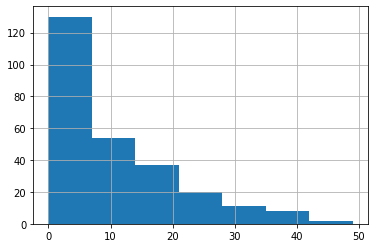

In [39]:
dete_resigned['years_of_work_total'] = dete_resigned['cease_date'] - dete_resigned['dete_start_date']
dete_resigned['years_of_work_total'].hist(bins=7)

<AxesSubplot:>

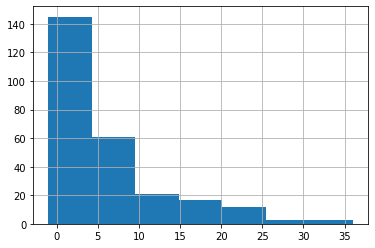

In [40]:
dete_resigned['years_of_work_current'] = dete_resigned['cease_date'] - dete_resigned['role_start_date']
dete_resigned['years_of_work_current'].hist(bins=7)

In [41]:
dete_resigned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 3 to 819
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   262 non-null    int64  
 1   separation_type                      262 non-null    object 
 2   cease_date                           262 non-null    int32  
 3   dete_start_date                      262 non-null    int32  
 4   role_start_date                      262 non-null    float64
 5   classification                       141 non-null    object 
 6   employment_status                    262 non-null    object 
 7   interpersonal_conflicts              262 non-null    bool   
 8   job_dissatisfaction                  262 non-null    bool   
 9   dissatisfaction_with_the_department  262 non-null    bool   
 10  physical_work_environment            262 non-null    bool   
 11  lack_of_recognition             

In [42]:
cut_labels = ['Less than 1 year', '1-2', '3-4', '5-6', '7-10', '11-20', 'More than 20 years']
cut_bins = [0, 1, 2, 4, 6, 10, 20, 50]
dete_resigned['years_of_work_total'] = pd.cut(dete_resigned['years_of_work_total'], bins=cut_bins, labels=cut_labels)

In [43]:
dete_resigned['years_of_work_total'].value_counts()

11-20                 52
More than 20 years    41
7-10                  39
5-6                   38
3-4                   36
Less than 1 year      22
1-2                   14
Name: years_of_work_total, dtype: int64

In [44]:
print(years_current)

['Less than 1 year', '1-2', '3-4', '11-20', 'More than 20 years', '7-10', '5-6']


In [45]:
cut_labels = ['Less than 1 year', '1-2', '3-4', '5-6', '7-10', '11-20', 'More than 20 years']
cut_bins = [0, 1, 2, 4, 6, 10, 20, 50]
dete_resigned['years_of_work_current'] = pd.cut(dete_resigned['years_of_work_current'], bins=cut_bins, labels=cut_labels)

In [46]:
dete_resigned['years_of_work_current'].value_counts()

3-4                   45
Less than 1 year      38
5-6                   35
11-20                 33
7-10                  31
1-2                   27
More than 20 years    18
Name: years_of_work_current, dtype: int64

In [47]:
dete_resigned.drop(['cease_date', 'dete_start_date', 'role_start_date'], axis=1)

,id,separation_type,classification,employment_status,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,...,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,years_of_work_total,years_of_work_current
3,4,Resignation-Other reasons,Primary,Permanent Full-time,False,False,False,False,False,False,...,False,False,False,False,False,False,Female,36-40,7-10,5-6
5,6,Resignation-Other reasons,NaN,Permanent Full-time,False,False,False,False,False,False,...,False,False,False,False,False,False,Female,41-45,11-20,11-20
8,9,Resignation-Other reasons,Secondary,Permanent Full-time,False,False,False,False,False,False,...,False,False,False,False,False,False,Female,31-35,3-4,3-4
9,10,Resignation-Other employer,NaN,Permanent Part-time,True,True,True,False,False,False,...,False,False,False,False,False,False,Female,46-50,11-20,3-4
11,12,Resignation-Move overseas/interstate,Secondary,Permanent Full-time,False,False,False,False,False,False,...,False,False,False,False,False,False,Male,31-35,3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,809,Resignation-Other reasons,Primary,Permanent Full-time,False,False,True,False,False,False,...,False,False,False,True,False,False,Female,36-40,7-10,7-10
808,810,Resignation-Other reasons,NaN,Permanent Part-time,False,False,False,False,False,False,...,False,False,False,False,False,False,Female,26-30,3-4,3-4
815,817,Resignation-Other employer,Primary,Permanent Full-time,False,False,False,False,False,False,...,False,False,False,False,False,False,Male,21-25,1-2,1-2
816,818,Resignation-Move overseas/interstate,Secondary,Permanent Full-time,False,False,False,False,False,False,...,True,False,False,False,False,False,Female,21-25,1-2,1-2


In [48]:
tafe_resigned['dissatisfaction'] = tafe_resigned['dissatisfaction'].replace({'Contributing Factors. Dissatisfaction ': True, '-': False})
tafe_resigned['dissatisfaction'].value_counts(dropna=False)

False    277
True      55
NaN        8
Name: dissatisfaction, dtype: int64

In [49]:
tafe_resigned['job_dissatisfaction'] = tafe_resigned['job_dissatisfaction'].replace({'Job Dissatisfaction': True, '-': False})
tafe_resigned['job_dissatisfaction'].value_counts(dropna=False)

False    270
True      62
NaN        8
Name: job_dissatisfaction, dtype: int64

In [50]:
tafe_resigned['interpersonal_conflicts'] = tafe_resigned['interpersonal_conflict'].replace({'Interpersonal Conflict': True, '-': False})
tafe_resigned['interpersonal_conflicts'].value_counts(dropna=False)

False    308
True      24
NaN        8
Name: interpersonal_conflicts, dtype: int64

In [51]:
tafe_resigned['dissatisfied'] = tafe_resigned[['job_dissatisfaction', 'dissatisfaction']].any(axis='columns', skipna=False)
tafe_resigned['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [52]:
dete_resigned['dissatisfied'] = dete_resigned[['job_dissatisfaction', 'dissatisfaction_with_the_department']].any(axis='columns', skipna=False)
dete_resigned['dissatisfied'].value_counts(dropna=False)

False    209
True      53
Name: dissatisfied, dtype: int64

In [53]:
tafe_resigned_up = tafe_resigned.copy()
dete_resigned_up = dete_resigned.copy()

In [54]:
tafe_resigned_up['institute'] = 'TAFE'
dete_resigned_up['institute'] = 'DETE'

In [55]:
exit_survey = pd.concat([tafe_resigned_up, dete_resigned_up], ignore_index=True)
exit_survey_clean = exit_survey.dropna(thresh=500, axis=1).drop(exit_survey.columns[1:4], axis=1).drop('job_dissatisfaction', axis=1)
exit_survey_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       602 non-null    float64
 1   gender                   547 non-null    object 
 2   age                      550 non-null    object 
 3   employment_status        552 non-null    object 
 4   years_of_work_total      532 non-null    object 
 5   years_of_work_current    517 non-null    object 
 6   interpersonal_conflicts  594 non-null    object 
 7   dissatisfied             594 non-null    object 
 8   institute                602 non-null    object 
dtypes: float64(1), object(8)
memory usage: 42.5+ KB


## Analysis_step_1

In [56]:
exit_survey_clean['years_of_work_total'].value_counts()

3-4                   99
Less than 1 year      95
1-2                   78
11-20                 78
5-6                   71
7-10                  60
More than 20 years    51
Name: years_of_work_total, dtype: int64

https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage

In [57]:
exit_survey['cats'] = exit_survey['years_of_work_total'].replace(['Less than 1 year', '1-2'], 'newbie').replace(
    ['3-4', '5-6'], 'sophomore').replace('7-10', 'tenured').replace(['11-20', 'More than 20 years'], 'sage')


In [58]:
exit_survey['dissatisfied'].value_counts(dropna=False)

False    450
True     144
NaN        8
Name: dissatisfied, dtype: int64

In [59]:
exit_survey['dissatisfied'].fillna(False, inplace=True)

In [60]:
exit_survey['interpersonal_conflicts'].value_counts(dropna=False)

False    552
True      42
NaN        8
Name: interpersonal_conflicts, dtype: int64

In [61]:
exit_survey['interpersonal_conflicts'].fillna(False, inplace=True)

In [62]:
exit_survey['age'].value_counts(dropna=False)

51-55            68
NaN              52
41  45           45
41-45            43
46  50           39
36-40            35
21  25           33
26  30           32
31  35           32
36  40           32
26-30            30
31-35            29
56 or older      29
46-50            28
21-25            26
56-60            22
61 or older      17
20 or younger    10
Name: age, dtype: int64

https://www.sciencedirect.com/science/article/pii/S0140197117301124

- young adults (19–25 years)
- mature adults (26–55 years)
- older adults (from 56 years)

In [63]:
pattern = r"(?P<ages>[2-6][0-6])"
ages = exit_survey['age'].str.extractall(pattern)
ages.index = ages.index.get_level_values(0)
print(ages.head())
ages['ages'] = pd.to_numeric(ages['ages'], errors='coerce')

  ages
1   41
1   45
2   56
3   20
4   46


In [64]:
ages_means = pd.pivot_table(data=ages, values = 'ages', index=ages.index)

ages_means.head()

,ages
1,43
2,56
3,20
4,48
5,38


In [65]:
cut_labels = ['young adults', 'mature adults', 'older adults']
cut_bins = [0, 25, 55, 100]
exit_survey['age_group'] = pd.cut(ages_means['ages'], bins=cut_bins, labels=cut_labels)
exit_survey['age_group'].value_counts()

mature adults    413
young adults      69
older adults      68
Name: age_group, dtype: int64

In [66]:
count_dissatisfied = pd.pivot_table(exit_survey, values=['dissatisfied', 'interpersonal_conflicts'], index='cats')

<AxesSubplot:title={'center':'Percentage of dissatisfied employees by category'}, xlabel='cats'>

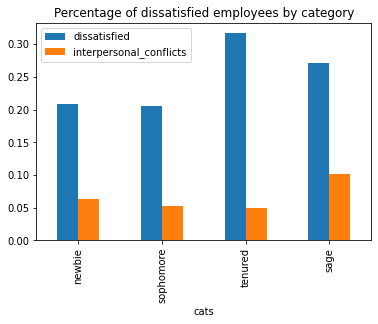

In [67]:
cats_reorder = ['newbie', 'sophomore', 'tenured', 'sage']
count_dissatisfied.reindex(cats_reorder).plot(kind='bar', title='Percentage of dissatisfied employees by category')

In [68]:
count_dissatisfied_gender = pd.pivot_table(exit_survey, values=['dissatisfied', 'interpersonal_conflicts'], index='gender')

<AxesSubplot:title={'center':'Percentage of dissatisfied employees by gender'}, xlabel='gender'>

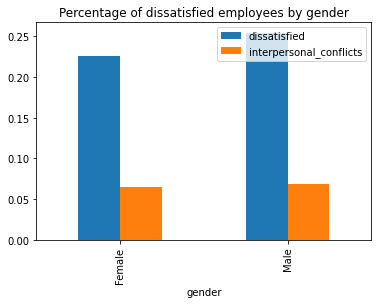

In [72]:
count_dissatisfied_gender.plot(kind='bar', title='Percentage of dissatisfied employees by gender')

In [70]:
count_dissatisfied_age = pd.pivot_table(exit_survey, values=['dissatisfied', 'interpersonal_conflicts'], index='age_group')

<AxesSubplot:title={'center':'Percentage of dissatisfied employees by age'}, xlabel='age_group'>

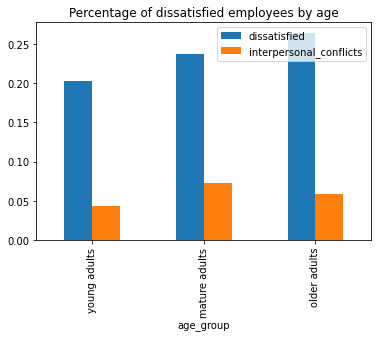

In [73]:
count_dissatisfied_age.plot(kind='bar', title='Percentage of dissatisfied employees by age')

# Conclusion
Trend for increasing the percentage of dissatisfied employeees with age (25% of them in the age group older than 56 years), as well as by increasing the time employee works in the institute (32% dissatisfied employees in the group of 'tenured' - 7-10 years and 'sage' more than 11 years with 27%). Interpersonal conflicts - highest values among 'sage' mature adults, probably among loyal employees who started to work in the institutes relatively young. Probably they idenity themselves with the institutes and would like to be appreciated by the institute.